# Clustering with pycaret
[Reference: Clustering Tutorial (CLU101)](https://www.pycaret.org/tutorials/html/CLU101.html)

In [1]:
import pandas as pd
data = pd.read_csv('minha-musica-playlist.csv')

In [2]:
data.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'loudness',
       'valence', 'speechiness', 'instrumentalness', 'liveness',
       'acousticness'],
      dtype='object')

In [3]:
# Select columns to keep on dataset
COLUMNS_KEEP = ['track_id', 'track_name', 'danceability', 'energy', 'tempo'] #, 'valence'] #, 'liveness', 'acousticness']

data = data[COLUMNS_KEEP]
data.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo'], dtype='object')

In [4]:
data.describe()

,danceability,energy,tempo
count,299.000000,299.000000,299.000000
mean,0.598876,0.629169,119.993171
std,0.146016,0.213013,26.798581
min,0.128000,0.040600,65.179000
25%,0.497500,0.479000,99.934500
50%,0.615000,0.655000,119.344000
75%,0.704000,0.801000,138.004000
max,0.941000,0.977000,189.892000


In [5]:
from pycaret.clustering import *
s = setup(data, normalize = True, 
                   ignore_features = ['track_name', 'track_id'],
                   session_id = 42)


Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Original Data,"(299, 5)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(299, 3)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [6]:
# create_model?

[Clustering modules](https://scikit-learn.org/stable/modules/clustering.html)

In [7]:
# Create Model
m = create_model('kmeans', num_clusters=5)

In [8]:
print(m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [9]:
results = assign_model(m)

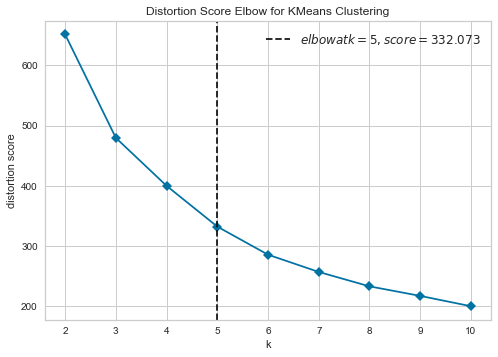

In [10]:
# Find best value of K
plot_model(m, plot = 'elbow')

In [11]:
plot_model(m, feature='track_name')

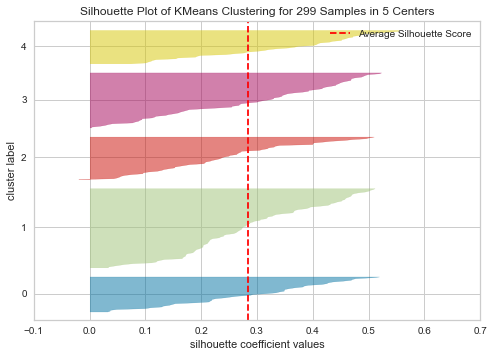

In [12]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
plot_model(m, plot = 'silhouette')

In [13]:
plot_model(m, plot = 'distribution') #to see size of clusters

In [14]:
results[['Cluster', 'track_name']].head(10)

,Cluster,track_name
0,Cluster 3,Have You Ever Seen The Rain
1,Cluster 1,Break It Down Again
2,Cluster 2,Stay
3,Cluster 3,A Visita
4,Cluster 1,O Que É O Que É?
5,Cluster 0,Loving Every Minute
6,Cluster 3,Nosso Pequeno Castelo
7,Cluster 2,Voce Abusou
8,Cluster 3,I Follow Rivers
9,Cluster 0,Relicário


In [15]:
# Check results
def print_cluster(id):
    return results[results['Cluster']==f'Cluster {id}'][['track_name']].head(30)

In [16]:
print_cluster(4)

,track_name
10,Meu Lugar
17,Sing
21,Don't Look Back in Anger - Remastered
29,"You Know My Name - From ""Casino Royale"" Soundt..."
32,Johnny B. Goode
55,One Of Us
68,Vou Deixar
71,O segundo sol
96,Bring Me To Life
104,The Passenger
